# Pre-processamento

O objetivo é preparar os dados do dataset credito.csv para prever se um cliente vai conseguir ou não empréstimo em instituição financeira.

In [1]:
# Importar as bibliotecas
from pandas import read_csv
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sbn

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer # Tratar valores nulos

## Análise Exploratória dos Dados

In [3]:
# Importar a base de dados
df = read_csv('credito.csv')

In [4]:
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [5]:
# Ter uma visão geral dos dados
df.describe()

,i#clientid,income,age,loan,c#default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [7]:
# Shape
# Tamanho - 2000 linhas e 5 colunas
df.shape

(2000, 5)

In [8]:
# Alterando nomes das colunas
df.columns = ["Id", "Renda", "Idade", "Emprestimo", "Exito"]

In [10]:
df.head()

,Id,Renda,Idade,Emprestimo,Exito
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [12]:
# Tipos de dados
df.dtypes

Id              int64
Renda         float64
Idade         float64
Emprestimo    float64
Exito           int64
dtype: object

In [14]:
# Correlação
df.corr(method = 'pearson')

,Id,Renda,Idade,Emprestimo,Exito
Id,1.000000,0.039280,-0.014704,0.018931,-0.020145
Renda,0.039280,1.000000,-0.033687,0.441117,0.002284
Idade,-0.014704,-0.033687,1.000000,0.002309,-0.429759
Emprestimo,0.018931,0.441117,0.002309,1.000000,0.377160
Exito,-0.020145,0.002284,-0.429759,0.377160,1.000000


In [16]:
# Proximidade de uma distribuição normal
df.skew()

Id            0.000000
Renda        -0.042621
Idade        -0.307964
Emprestimo    0.624284
Exito         2.058717
dtype: float64

## Explorar dados de cada coluna

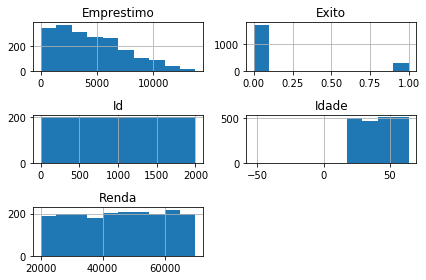

In [34]:
df.hist()
plt.tight_layout()
plt.show()

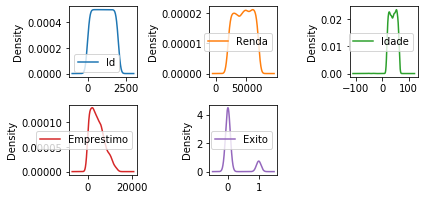

In [39]:
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.tight_layout()
plt.show()

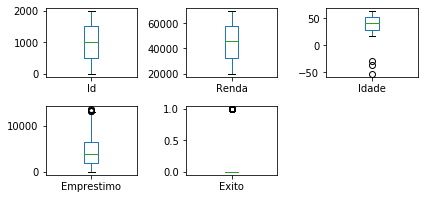

In [43]:
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.tight_layout()
plt.show()

In [ ]:
# Explorar dados - Renda
df['Renda'].describe()

In [54]:
# Média de renda - 45000 por ano
df['Renda'].mean()

45331.60001779331

In [55]:
# Idade - Problema (Idade negativa)
df['Idade'].describe()

count    1997.000000
mean       40.807559
std        13.624469
min       -52.423280
25%        28.990415
50%        41.317159
75%        52.587040
max        63.971796
Name: Idade, dtype: float64

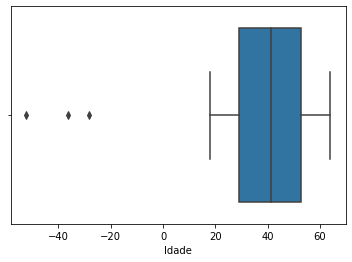

In [56]:
# Boxplot - Podemos ver os valores insconsitentes (Negativos)
sbn.boxplot(df['Idade'])

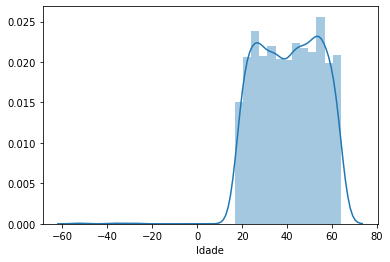

In [57]:
# Distribuição - 20 a 60 anos (Normal)
sbn.distplot(df['Idade'])

In [58]:
# Valor scolicitado para Emprestimo
df['Emprestimo'].describe()

count     2000.000000
mean      4444.369695
std       3045.410024
min          1.377630
25%       1939.708847
50%       3974.719419
75%       6432.410625
max      13766.051239
Name: Emprestimo, dtype: float64

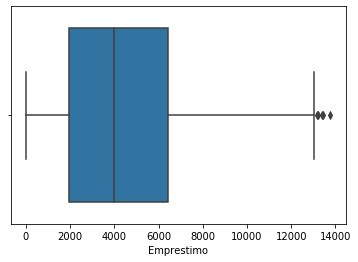

In [59]:
# Alguns valores bem acima, mas não há problema pois o cliente pode solicitar o quanto quiser
sbn.boxplot(df['Emprestimo'])

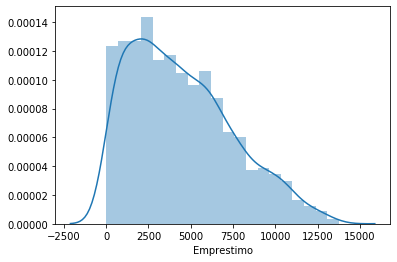

In [60]:
# Pedidos estão concentrados entre 0 e 2500
sbn.distplot(df['Emprestimo'])

In [61]:
# Quantificação dos que conseguiram e não conseguiram empréstimo 
grupo = df.groupby(['Exito']).size(); grupo

Exito
0    1717
1     283
dtype: int64

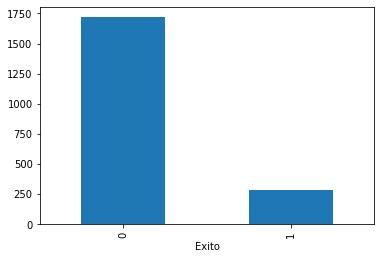

In [62]:
# Grande maioria não conseguiu - 0
grupo.plot.bar()

# Resolvendo os problemas

Localizando atributos com problemas, no caso existem idades menores que 0.

In [63]:
# Localizar todas as idades menores que 0
df.loc[df['Idade'] < 0]

,Id,Renda,Idade,Emprestimo,Exito
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [64]:
# Preencher os valores com a média
media = df['Idade'][df.Idade > 0].mean(); media

40.92770044906149

In [65]:
# Alterando os dados
df.loc[df.Idade < 0, 'Idade'] = media

In [66]:
# Já não há valores negativos
df['Idade'].describe()

count    1997.000000
mean       40.927700
std        13.261825
min        18.055189
25%        29.072097
50%        41.317159
75%        52.587040
max        63.971796
Name: Idade, dtype: float64

In [67]:
# Veja que já não há valores abaixo de zero
df.loc[df['Idade'] < 0]

,Id,Renda,Idade,Emprestimo,Exito


In [68]:
# Verificando se há valores faltantes - 3 em Idades
df.isnull().sum()

Id            0
Renda         0
Idade         3
Emprestimo    0
Exito         0
dtype: int64

In [69]:
# Localizando os faltantes de idade
df.loc[pd.isnull(df['Idade'])]

,Id,Renda,Idade,Emprestimo,Exito
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [71]:
# Resolvendo
df['Idade'].fillna(value=df['Idade'].mean(), inplace=True)

In [73]:
# Problema resolvido
df.isnull().sum()

Id            0
Renda         0
Idade         0
Emprestimo    0
Exito         0
dtype: int64

In [89]:
df.loc[pd.isnull(df['Idade'])]

,Id,Renda,Idade,Emprestimo,Exito


## Previsores, Classe

In [90]:
# Array com os dados previsores - Todas as linhas do atributo 1 ao 3 (Renda, Idade, Emprestimo)
previsores = df.iloc[:, 1:4].values; previsores

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [91]:
# Subset - Visualização em formato DataFrame
pd.DataFrame(previsores).head()

,0,1,2
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235


In [92]:
# Variável classe - Todas as linhas da coluna 4 (Exito)
classe = df.iloc[:, 4].values; classe

array([0, 0, 0, ..., 1, 0, 0])

## Padronização e Normalização

Atributos com valores grandes podem ser "entendidos" pelo algoritmo como mais importantes. O escalonamento padroniza os dados no mesmo nível aumentando a acurácia e reduzindo o tempo de processamento.

In [93]:
# Criando objeto para escalonamento dos atributos - Padronização
scaler = StandardScaler()

In [94]:
previsores = scaler.fit_transform(previsores); previsores

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

In [95]:
# Agora estão na mesma escala
previsores = pd.DataFrame(previsores); previsores

,0,1,2
0,1.453934,1.365380,1.202819
1,-0.762176,0.542659,0.696427
2,0.836821,1.674171,1.174711
3,-0.183070,0.364136,0.544980
4,1.509563,-1.686475,1.420765
...,...,...,...
1995,0.969747,0.572929,-0.826907
1996,1.688540,-1.340946,-0.309130
1997,-0.071226,-0.974486,0.354201
1998,-0.110003,1.739367,-0.926756


In [96]:
df_previsores = previsores.copy()

In [97]:
# Salvando os dados preprocessados em outro arquivo para a próxima fase
df_previsores.to_csv('previsores.csv', index=False)